IMPORTING REQUIREMENTS

In [19]:
import fastf1 as ff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fastf1.plotting
fastf1.plotting.setup_mpl()
import fastf1.api as fap

C:\Users\HAI\AppData\Roaming\Python\Python311\site-packages\fastf1\api.py:32: UserWarning: `fastf1.api` will be considered private in future releases and potentially be removed or changed!
  warnings.warn("`fastf1.api` will be considered private in future releases and "


GETTING SESSIONAL DATA

In [20]:
session = ff.get_session(2021,'Belgium','Q')
session.load() 

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
req            INFO 	Data has been written to cache!
core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v3.3.7]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading 

GETTING LAPS AND TELEMETRY DATA OF EACH DRIVER

In [21]:
ham_lap = session.laps.pick_driver('HAM').pick_fastest()
ham_tel = ham_lap.get_car_data().add_distance()
gr_lap=session.laps.pick_driver('RUS').pick_fastest()
gr_tel=gr_lap.get_car_data().add_distance()

PLOTTING GRAPH

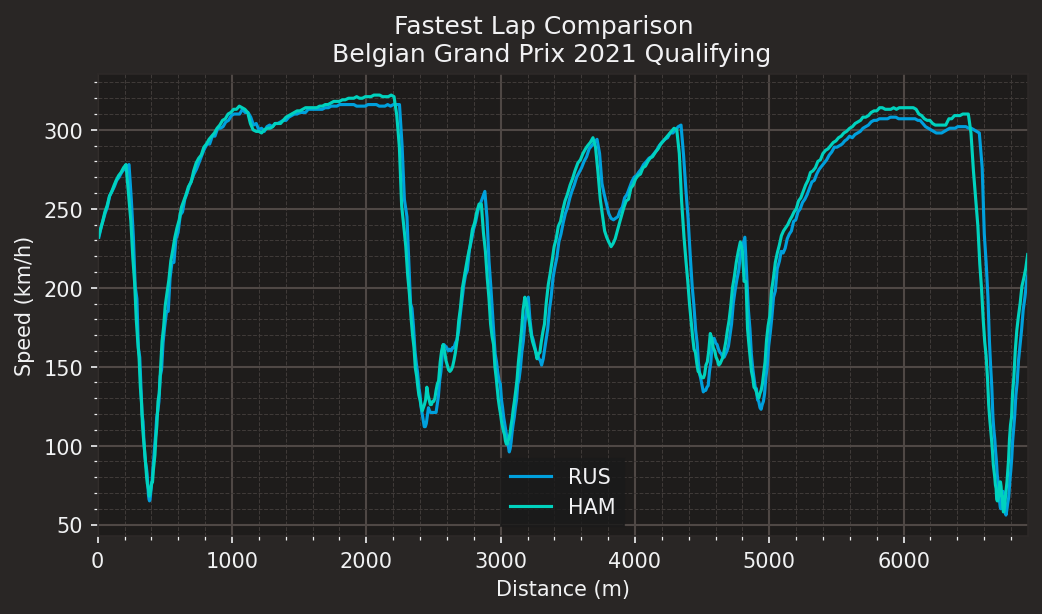

In [22]:
will_color=fastf1.plotting.team_color('WIL')
mer_color = fastf1.plotting.team_color('MER')
fig, ax = plt.subplots(figsize=(8,4),dpi=150)
ax.plot(gr_tel['Distance'],gr_tel['Speed'], color=will_color,label='RUS')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='HAM')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Speed (km/h)')
ax.set_xlim(0,max(ham_tel['Distance']))

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()

In [14]:
# msg=fap.race_control_messages(session.api_path, response=None,livedata=None )

In [16]:
racesession=ff.get_session(2021,'Russia','R')
racesession.load()

core           INFO 	Loading data for Russian Grand Prix - Race [v3.3.7]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

In [19]:
weather=fap.weather_data(racesession.api_path)
weatherdf=pd.DataFrame(weather)
weatherdf

req            INFO 	Using cached data for weather_data


,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:09.406000,19.1,60.5,1023.5,False,22.6,139,0.3
1,0 days 00:01:09.418000,19.1,60.3,1023.5,False,22.5,157,0.2
2,0 days 00:02:09.421000,19.1,60.3,1023.5,False,22.5,157,0.2
3,0 days 00:03:09.440000,19.1,60.8,1023.4,False,22.5,124,0.2
4,0 days 00:04:09.429000,19.1,60.8,1023.4,False,22.5,124,0.2
...,...,...,...,...,...,...,...,...
153,0 days 02:33:10,17.7,71.9,1023.1,True,19.6,182,0.9
154,0 days 02:34:10.002000,17.6,71.0,1023.0,True,19.5,173,0.9
155,0 days 02:35:10.030000,17.5,72.4,1023.0,True,19.1,161,0.6
156,0 days 02:36:10.003000,17.4,72.4,1023.0,True,19.1,161,0.6


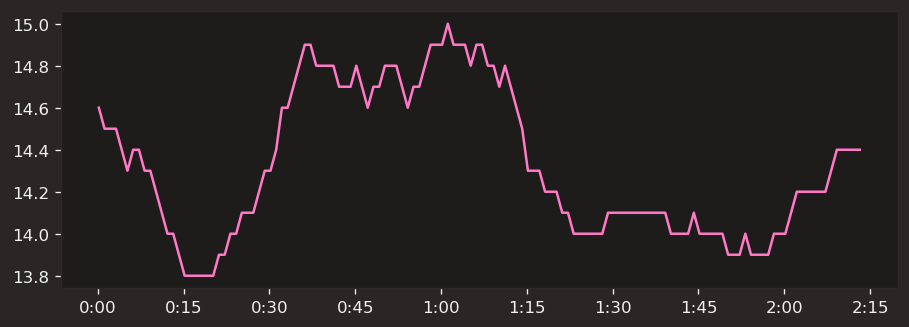

In [29]:
time = weatherdf['Time']
Temp = weatherdf['AirTemp']

plt.figure(figsize=(9,3),dpi = 120)
plt.plot(time,Temp)
plt.show()